In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("clv_data.csv")

In [3]:
df.head()

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Order_ID                  5000 non-null   object        
 1   Customer_ID               5000 non-null   object        
 2   Date                      5000 non-null   datetime64[ns]
 3   Age                       5000 non-null   int64         
 4   Gender                    5000 non-null   object        
 5   City                      5000 non-null   object        
 6   Product_Category          5000 non-null   object        
 7   Unit_Price                5000 non-null   float64       
 8   Quantity                  5000 non-null   int64         
 9   Discount_Amount           5000 non-null   float64       
 10  Total_Amount              5000 non-null   float64       
 11  Payment_Method            5000 non-null   object        
 12  Device_Type         

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.isnull().sum()

Order_ID                    0
Customer_ID                 0
Date                        0
Age                         0
Gender                      0
City                        0
Product_Category            0
Unit_Price                  0
Quantity                    0
Discount_Amount             0
Total_Amount                0
Payment_Method              0
Device_Type                 0
Session_Duration_Minutes    0
Pages_Viewed                0
Is_Returning_Customer       0
Delivery_Time_Days          0
Customer_Rating             0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,Date,Age,Unit_Price,Quantity,Discount_Amount,Total_Amount,Session_Duration_Minutes,Pages_Viewed,Delivery_Time_Days,Customer_Rating
count,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000
mean,2023-08-16 09:16:24.959999744,35.032600,455.834120,2.220000,24.852804,983.108914,14.57340,8.98420,6.497000,3.902800
min,2023-01-01 00:00:00,18.000000,5.180000,1.000000,0.000000,7.870000,1.00000,1.00000,1.000000,1.000000
25%,2023-04-30 00:00:00,27.000000,76.587500,1.000000,0.000000,122.517500,8.00000,7.00000,4.000000,3.000000
50%,2023-08-17 00:00:00,35.000000,182.950000,2.000000,0.000000,337.910000,13.00000,9.00000,6.000000,4.000000
75%,2023-12-06 00:00:00,42.000000,513.930000,3.000000,8.760000,979.695000,19.00000,11.00000,8.000000,5.000000
max,2024-03-26 00:00:00,75.000000,7159.450000,5.000000,1525.550000,22023.900000,73.00000,24.00000,25.000000,5.000000
std,NaN,11.080546,712.477209,1.398711,88.385124,1898.978528,8.66575,2.80434,3.464966,1.128542


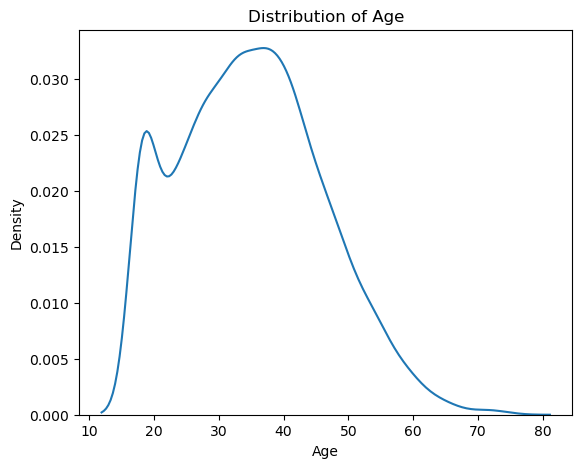

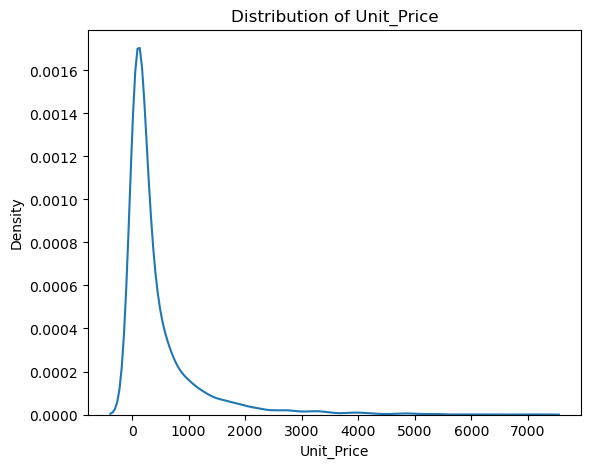

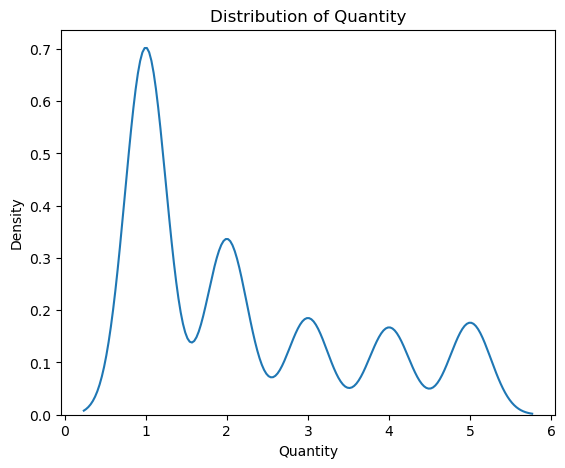

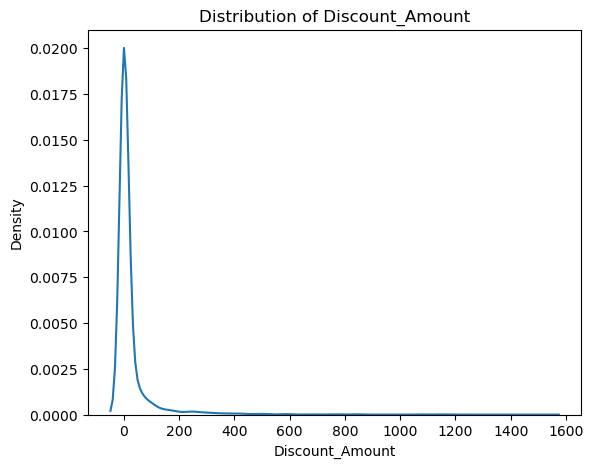

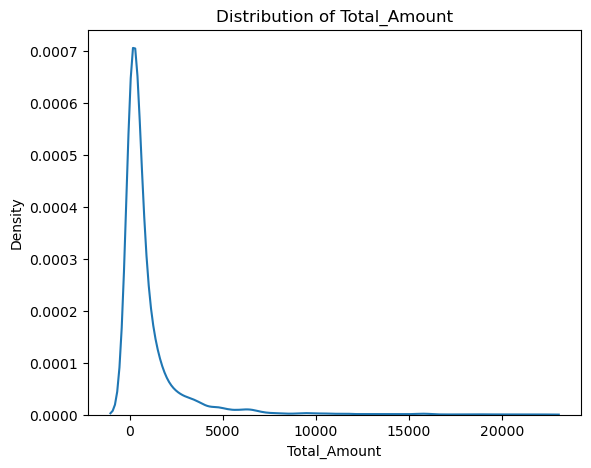

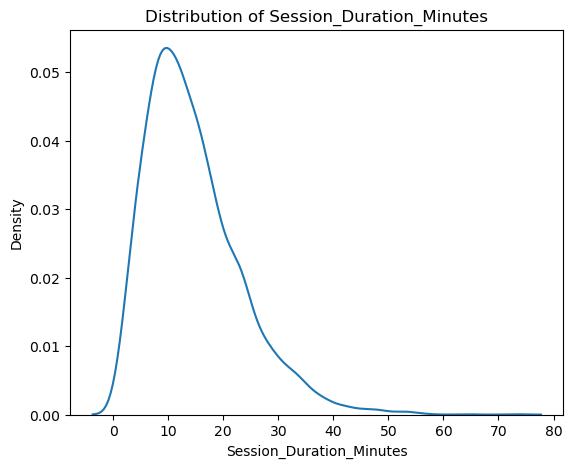

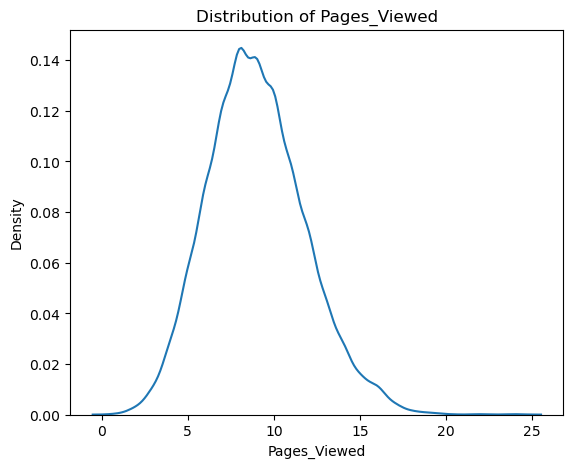

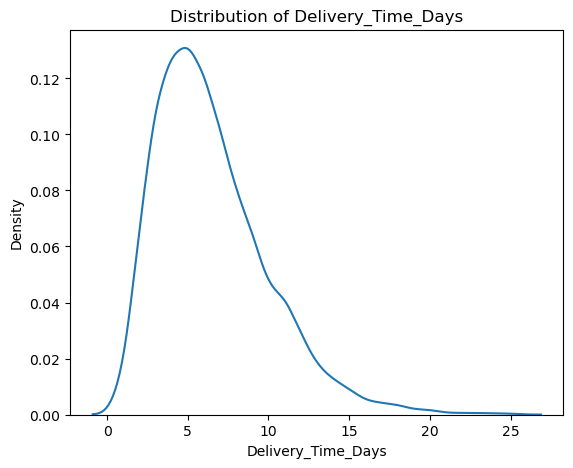

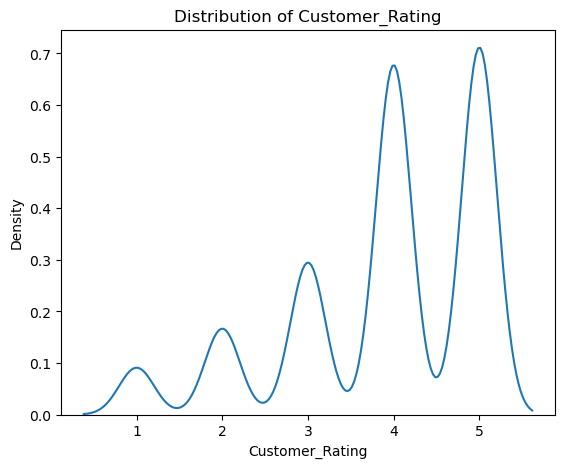

In [13]:
num_cols = ['Age', 'Unit_Price', 'Quantity', 'Discount_Amount', 'Total_Amount','Session_Duration_Minutes','Pages_Viewed','Delivery_Time_Days','Customer_Rating']

for col in num_cols:
    plt.figure(figsize=(14,5))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.kdeplot(df[col])
    plt.title(f"Distribution of {col}")

<Axes: >

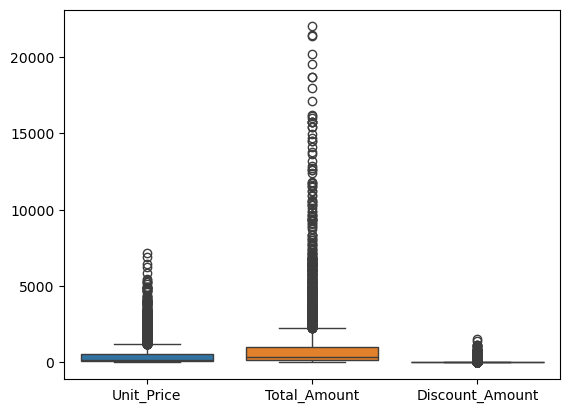

In [14]:

sns.boxplot(data=df[["Unit_Price", "Total_Amount", "Discount_Amount"]])

In [15]:
df['Total_Amount'] = df['Total_Amount'].round(0).astype(int)

In [16]:


num_cols = ["Unit_Price", "Total_Amount", "Discount_Amount"]

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap and floor the outliers
    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

print(df[num_cols].describe())

        Unit_Price  Total_Amount  Discount_Amount
count  5000.000000   5000.000000      5000.000000
mean    353.589695    672.898600         5.219484
std     372.751011    733.108543         8.713484
min       5.180000      8.000000         0.000000
25%      76.587500    123.000000         0.000000
50%     182.950000    338.000000         0.000000
75%     513.930000    980.000000         8.760000
max    1169.943750   2265.500000        21.900000


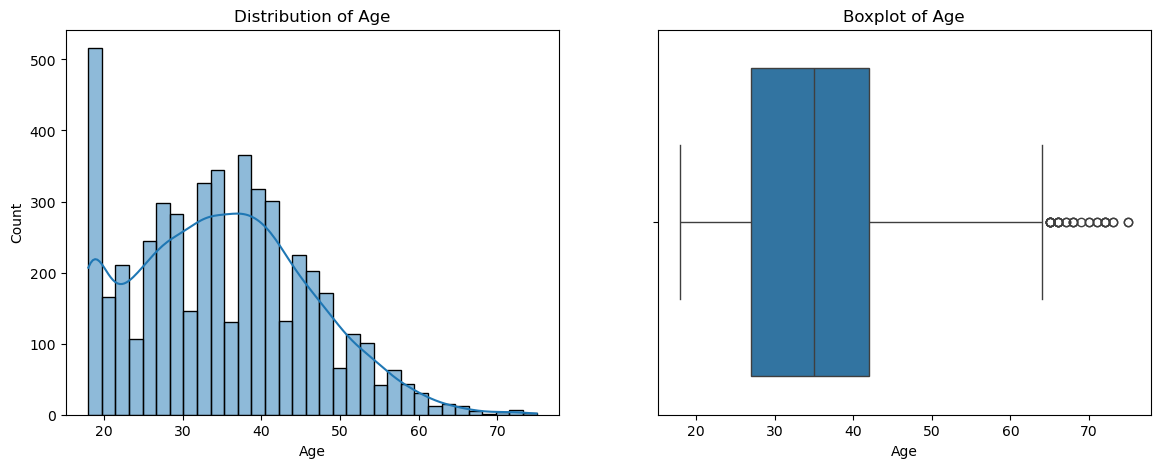

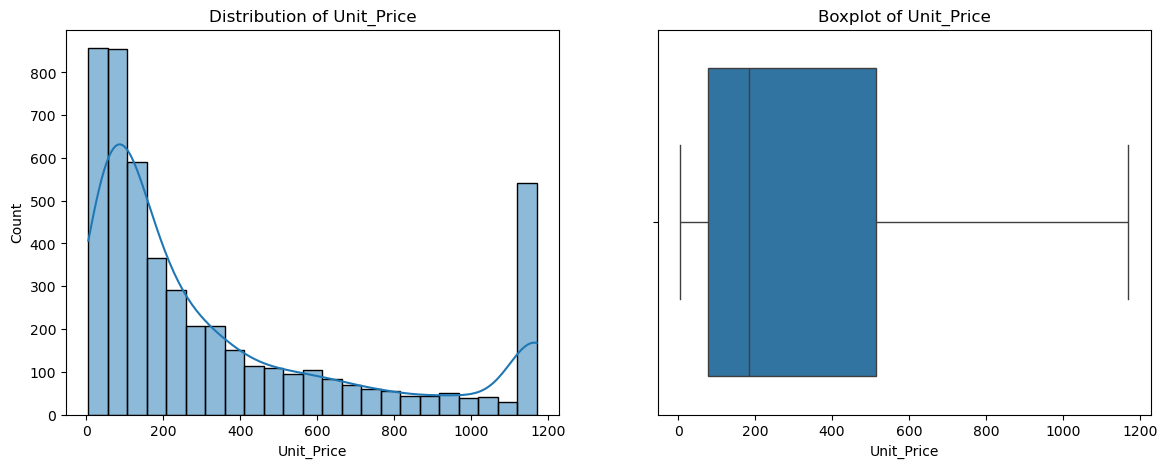

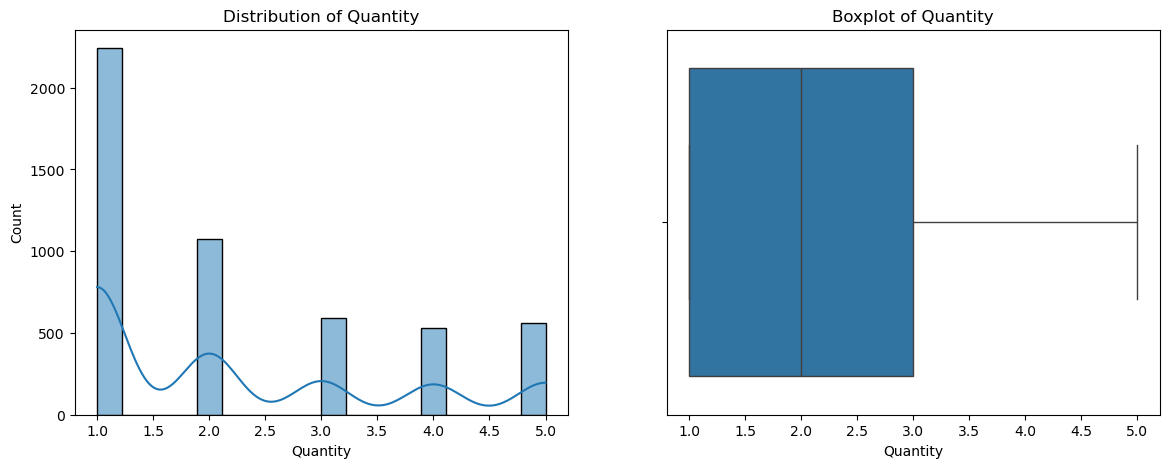

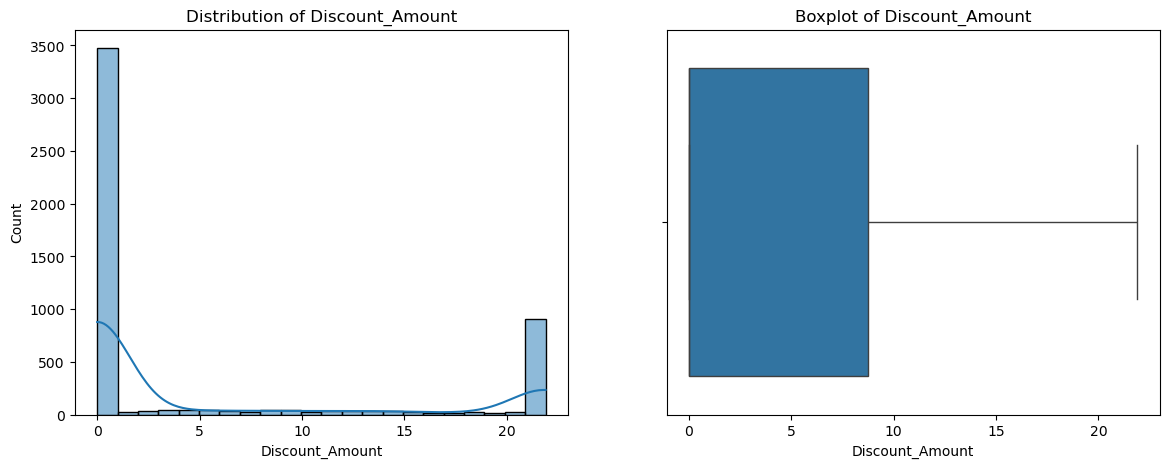

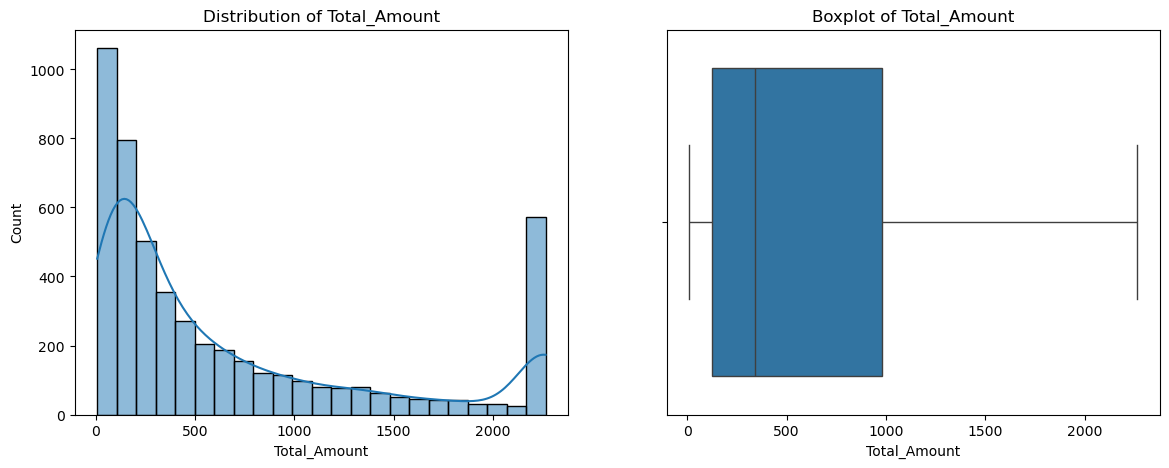

In [18]:
num_cols = ['Age', 'Unit_Price', 'Quantity', 'Discount_Amount', 'Total_Amount']

for col in num_cols:
    plt.figure(figsize=(14,5))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

    plt.show()


In [19]:
df.columns

Index(['Order_ID', 'Customer_ID', 'Date', 'Age', 'Gender', 'City',
       'Product_Category', 'Unit_Price', 'Quantity', 'Discount_Amount',
       'Total_Amount', 'Payment_Method', 'Device_Type',
       'Session_Duration_Minutes', 'Pages_Viewed', 'Is_Returning_Customer',
       'Delivery_Time_Days', 'Customer_Rating'],
      dtype='object')

In [21]:
cat_cols = [
    'Gender',
    'City',
    'Product_Category',
    'Payment_Method',
    'Device_Type',
    'Is_Returning_Customer'
]

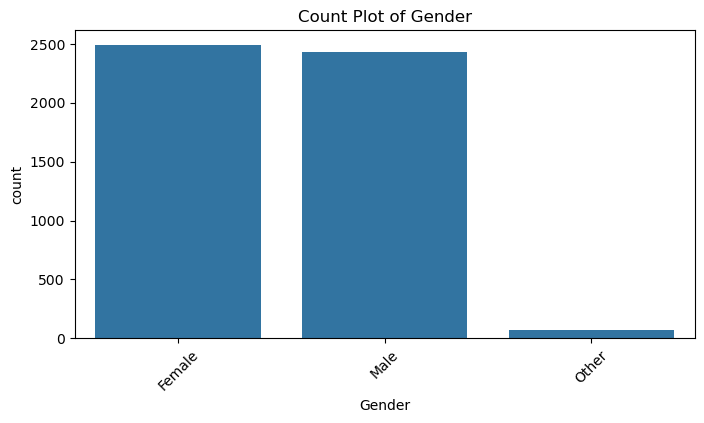

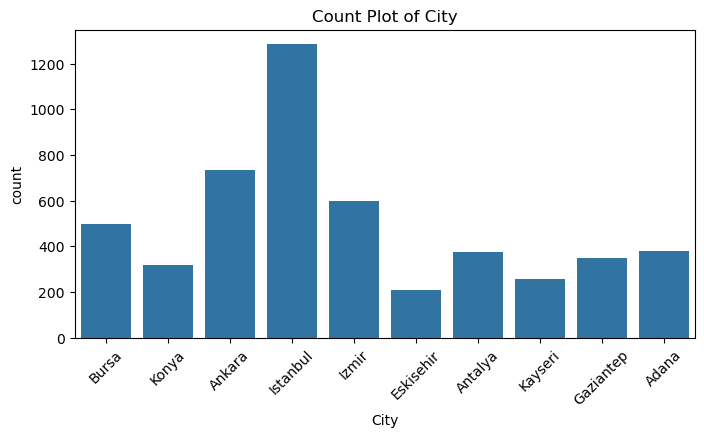

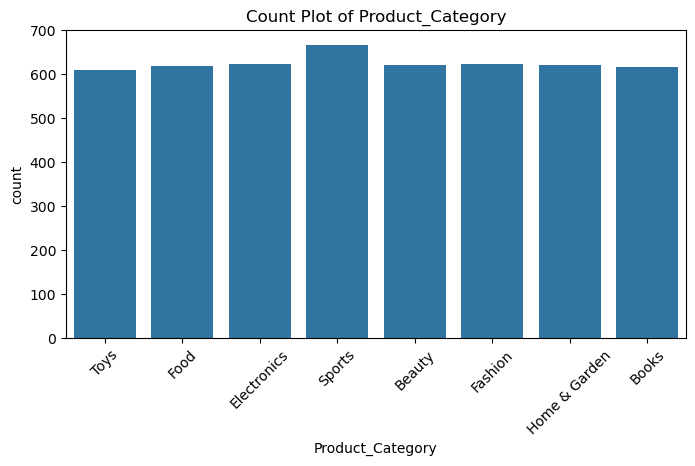

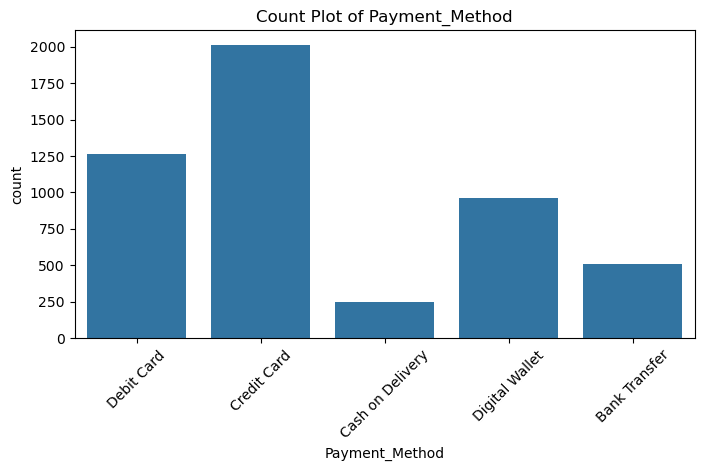

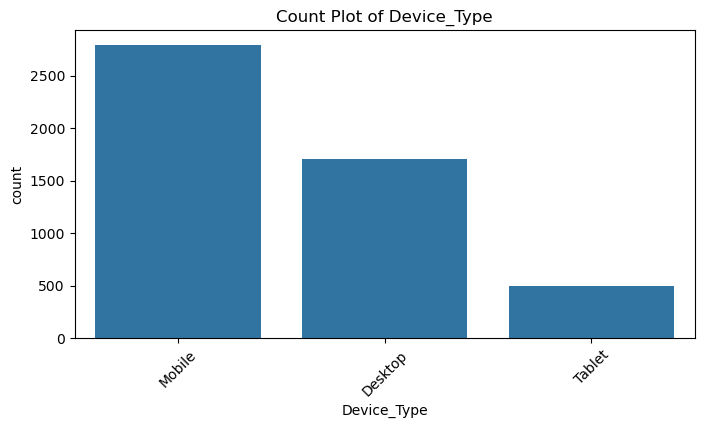

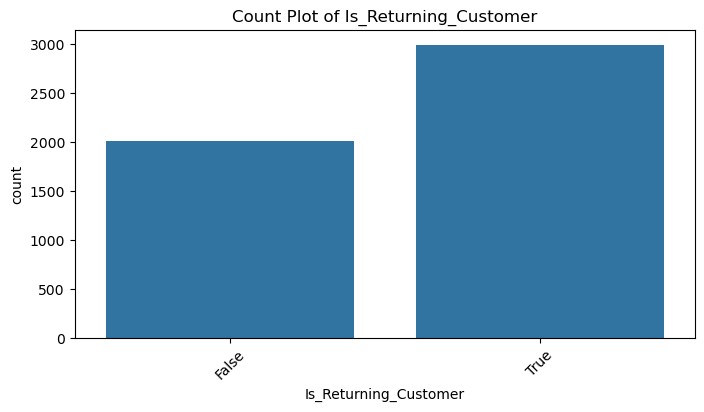

In [22]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=df[col])
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()


In [34]:
# C# Step 1: Aggregate Total_Amount per customer
# Step 1: Calculate total spent per customer
total_spent = df.groupby('Customer_ID')['Total_Amount'].sum()

# Step 2: Create new feature Total_Spent in df using map()
df['Total_Spent'] = df['Customer_ID'].map(total_spent)

# Step 3: Set target variable
target = 'Total_Spent'


In [36]:
df['Total_Spent']

0         54.0
1        245.0
2        241.0
3        575.0
4       2265.5
         ...  
4995     103.0
4996      72.0
4997      34.0
4998     171.0
4999     315.0
Name: Total_Spent, Length: 5000, dtype: float64

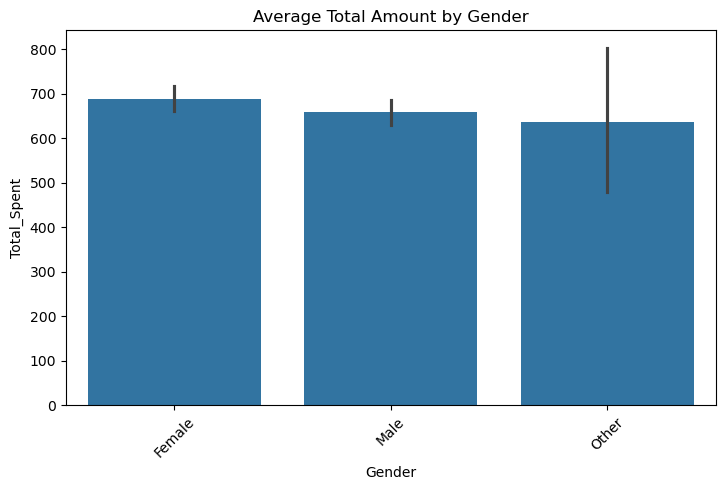

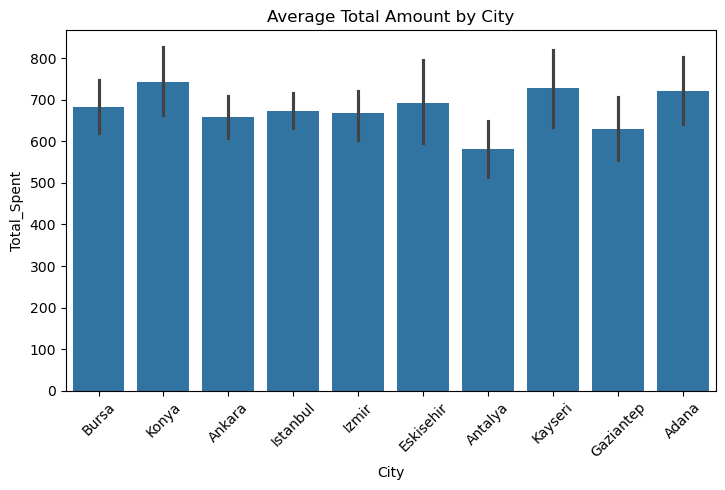

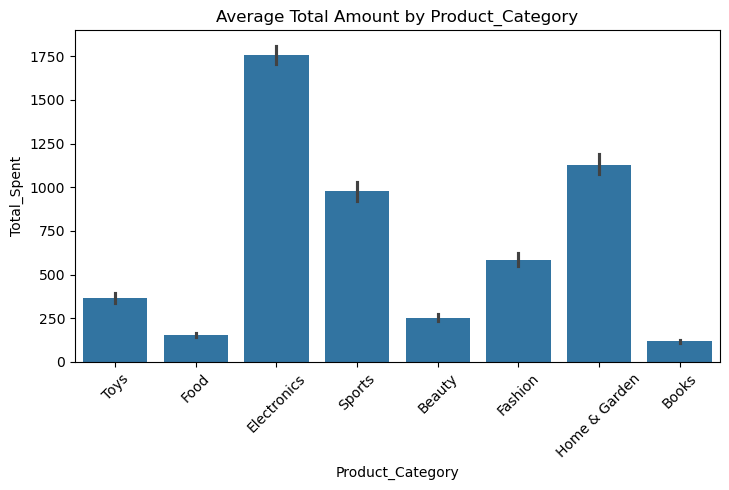

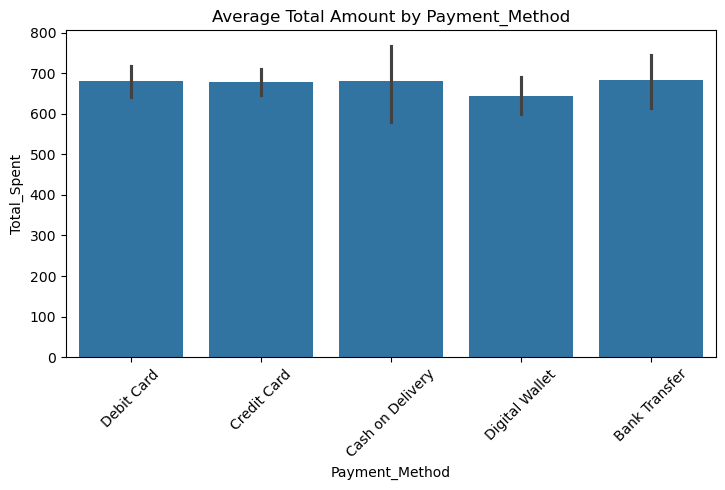

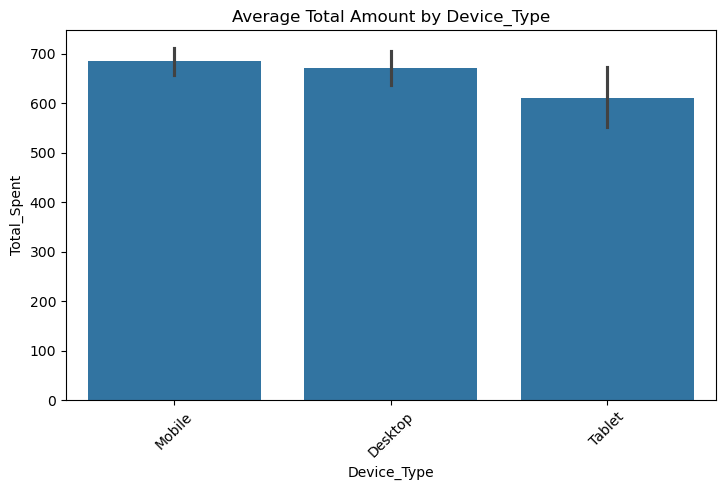

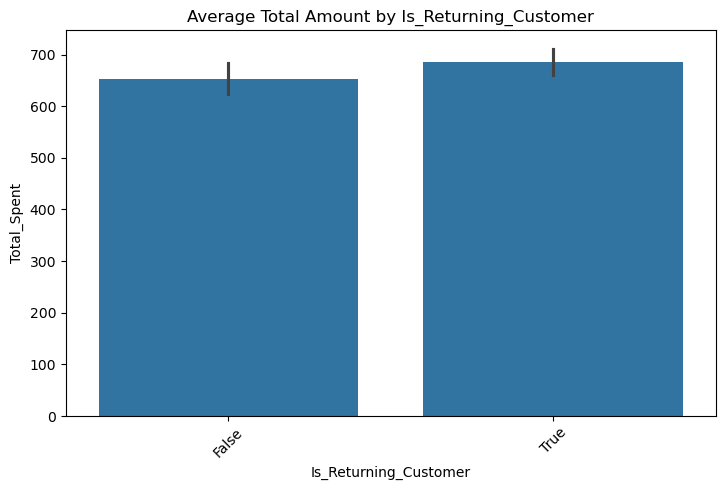

In [35]:
cat_cols = [
    'Gender',
    'City',
    'Product_Category',
    'Payment_Method',
    'Device_Type',
    'Is_Returning_Customer'
]

for col in cat_cols:
    plt.figure(figsize=(14,5))

    # Barplot (Average spend)
    plt.subplot(1,2,1)
    sns.barplot(x=df[col], y=df[target])
    plt.title(f"Average Total Amount by {col}")
    plt.xticks(rotation=45)


    plt.tight_layout()
    plt.show()


In [37]:
num_cols = ['Age', 'Unit_Price', 'Quantity', 'Discount_Amount','Total_Amount',
            'Session_Duration_Minutes', 'Pages_Viewed', 'Delivery_Time_Days',
            'Customer_Rating', 'Year', 'Month', 'Day', 'Weekend']
cat_cols = ['Gender', 'City',
            'Product_Category', 'Payment_Method', 'Device_Type',
            'Is_Returning_Customer']
target='Total_Spent'

In [38]:

df['Date'] = pd.to_datetime(df['Date'])

# Extract features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekend'] = df['Date'].dt.weekday  # 0 = Monday, 6 = Sunday


In [39]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder,MinMaxScaler

In [40]:
scaler=StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [41]:
# One-hot encode categorical columns and drop first to avoid dummy variable trap
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Optional: convert boolean columns to 0/1 integers
dummy_cols = [col for col in df.columns if any(c in col for c in cat_cols)]
df[dummy_cols] = df[dummy_cols].astype(int)

print("Categorical columns successfully one-hot encoded. New shape:", df.shape)

Categorical columns successfully one-hot encoded. New shape: (5000, 42)


feature selection using correaltion using numerical vs numerical 

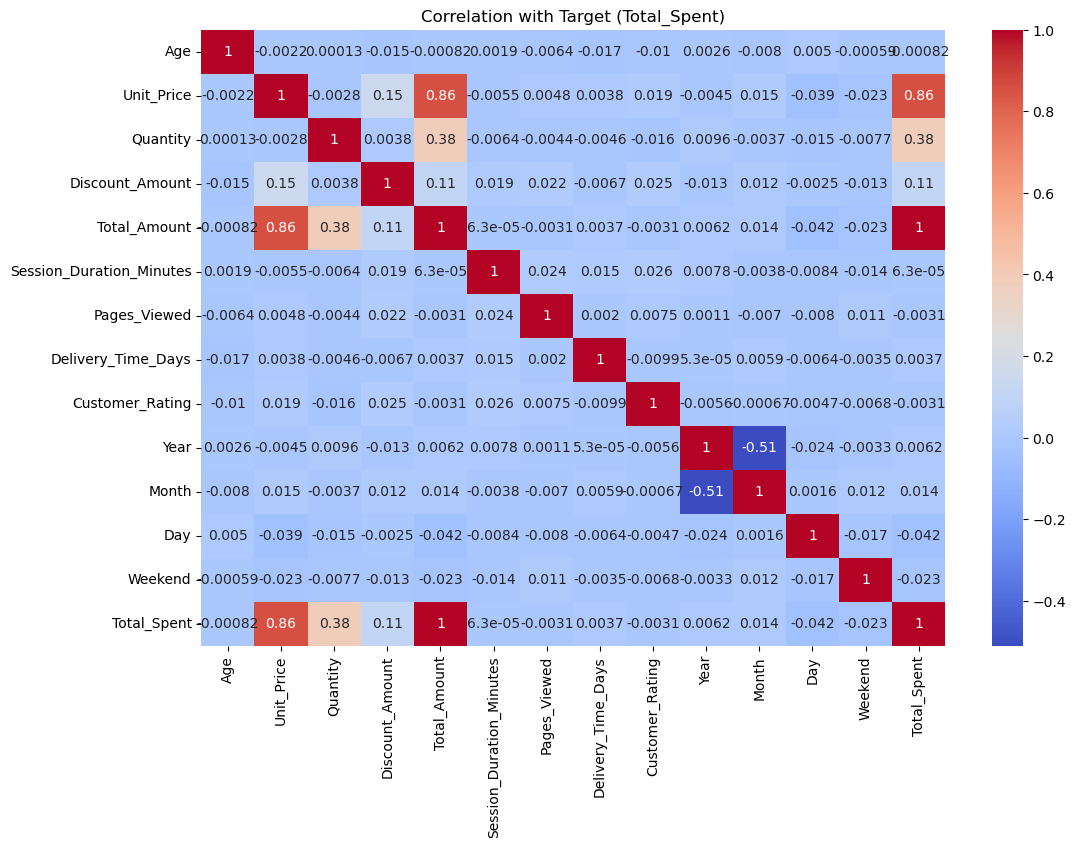

In [42]:

num_cols = ['Age', 'Unit_Price', 'Quantity', 'Discount_Amount','Total_Amount',
            'Session_Duration_Minutes', 'Pages_Viewed', 'Delivery_Time_Days',
            'Customer_Rating', 'Year', 'Month', 'Day', 'Weekend']

target = ['Total_Spent']   # MUST be a list, correct column name

corr = df[num_cols + target].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation with Target (Total_Spent)")
plt.show()


In [45]:
from sklearn.feature_selection import f_regression
import pandas as pd

# cat_cols = ['Gender','City','Product_Category','Payment_Method','Device_Type','Is_Returning_Customer', ...]  
# Make sure cat_cols is already defined

# 1. Select one-hot encoded columns belonging to categorical features
cat_cols_encoded = [
    col for col in df.columns 
    if any(col.startswith(c + "_") for c in cat_cols)
]

# 2. Independent & Target variable
X_cat = df[cat_cols_encoded]
y = df[target]   # target = 'Total_Spent'

# 3. F-test for regression (ANOVA F-score)
f_scores, p_values = f_regression(X_cat, y)

# 4. Build results dataframe
anova_results = pd.DataFrame({
    'Feature': cat_cols_encoded,
    'F_score': f_scores,
    'p_value': p_values
})

# 5. Select best features (p-value < 0.05)
selected_cat_features = (
    anova_results[anova_results['p_value'] < 0.05]['Feature']
    .tolist()
)

print("Selected categorical features:", selected_cat_features)


Selected categorical features: ['City_Antalya', 'Product_Category_Books', 'Product_Category_Electronics', 'Product_Category_Fashion', 'Product_Category_Food', 'Product_Category_Home & Garden', 'Product_Category_Sports', 'Product_Category_Toys', 'Device_Type_Tablet']


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
df.columns

Index(['Order_ID', 'Customer_ID', 'Date', 'Age', 'Unit_Price', 'Quantity',
       'Discount_Amount', 'Total_Amount', 'Session_Duration_Minutes',
       'Pages_Viewed', 'Delivery_Time_Days', 'Customer_Rating', 'Total_Spent',
       'Year', 'Month', 'Day', 'Weekend', 'Gender_Male', 'Gender_Other',
       'City_Ankara', 'City_Antalya', 'City_Bursa', 'City_Eskisehir',
       'City_Gaziantep', 'City_Istanbul', 'City_Izmir', 'City_Kayseri',
       'City_Konya', 'Product_Category_Books', 'Product_Category_Electronics',
       'Product_Category_Fashion', 'Product_Category_Food',
       'Product_Category_Home & Garden', 'Product_Category_Sports',
       'Product_Category_Toys', 'Payment_Method_Cash on Delivery',
       'Payment_Method_Credit Card', 'Payment_Method_Debit Card',
       'Payment_Method_Digital Wallet', 'Device_Type_Mobile',
       'Device_Type_Tablet', 'Is_Returning_Customer_True'],
      dtype='object')

In [47]:
from sklearn.feature_selection import f_regression
import pandas as pd

# X = encoded categorical features
X_cat = df[cat_cols_encoded]

# y = your target variable
y = df[target]  # target = 'Total_Spent'

# Run F-regression
f_scores, p_values = f_regression(X_cat, y)

# Put results in DataFrame
anova_results = pd.DataFrame({
    'Feature': cat_cols_encoded,
    'F_score': f_scores,
    'p_value': p_values
})

# Select important categorical features
selected_cat_features = anova_results[anova_results['p_value'] < 0.05]['Feature'].tolist()

print("Selected categorical features:", selected_cat_features)


Selected categorical features: ['City_Antalya', 'Product_Category_Books', 'Product_Category_Electronics', 'Product_Category_Fashion', 'Product_Category_Food', 'Product_Category_Home & Garden', 'Product_Category_Sports', 'Product_Category_Toys', 'Device_Type_Tablet']


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:

num_cols = ['Age', 'Unit_Price', 'Quantity', 'Discount_Amount','Total_Amount',
            'Session_Duration_Minutes', 'Pages_Viewed', 'Delivery_Time_Days',
            'Customer_Rating', 'Year', 'Month', 'Day', 'Weekend']
target="Total_Spent"

In [61]:
# Make sure num_cols is a simple list of column names
num_cols = list(df[num_cols].columns)

# Make sure target is a string
target = str(target)

# 1. Compute correlation
corr_matrix = df[num_cols + [target]].corr()

# 2. Extract correlation against target
numerical_corr = corr_matrix[target].drop(target)

# 3. Select features with abs correlation > threshold
threshold = 0.05
selected_num_features = numerical_corr[abs(numerical_corr) > threshold].index.tolist()

print("Selected numerical features:", selected_num_features)


Selected numerical features: ['Unit_Price', 'Quantity', 'Discount_Amount', 'Total_Amount']


In [62]:
selected_features = selected_num_features + selected_cat_features
print("All selected features for modeling:", selected_features)

All selected features for modeling: ['Unit_Price', 'Quantity', 'Discount_Amount', 'Total_Amount', 'City_Antalya', 'Product_Category_Books', 'Product_Category_Electronics', 'Product_Category_Fashion', 'Product_Category_Food', 'Product_Category_Home & Garden', 'Product_Category_Sports', 'Product_Category_Toys', 'Device_Type_Tablet']


In [63]:
from sklearn.model_selection import train_test_split

In [65]:
X = df[selected_features]   # encoded + scaled features
y = df['Total_Spent']       # target variable

# -------------------------------
# 2️⃣ Train-test split
# -------------------------------
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# -------------------------------
# 3️⃣ Check shapes
# -------------------------------
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


x_train: (3500, 13)
x_test: (1500, 13)
y_train: (3500,)
y_test: (1500,)


In [66]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# -------------------------------
# 3️⃣ Train and evaluate each model
# -------------------------------
results = []

for name, model in models.items():
    # Train
    model.fit(x_train, y_train)
    
    # Predict
    y_pred = model.predict(x_test)
    
    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'MAE': mae,
        'RMSE': rmse,
        'R2_Score': r2
    })

# -------------------------------
# 4️⃣ Compare results
# -------------------------------
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='RMSE')  # sort by RMSE ascending
print(results_df)

               Model           MAE          RMSE  R2_Score
0  Linear Regression  2.879688e-13  3.677700e-13  1.000000
2   Lasso Regression  9.630941e-02  1.271275e-01  1.000000
1   Ridge Regression  4.354339e-01  5.887454e-01  0.999999
4      Random Forest  3.378900e-01  9.089606e-01  0.999998
5  Gradient Boosting  2.613652e+00  3.885330e+00  0.999971
3         ElasticNet  4.281636e+01  5.942413e+01  0.993303


In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# -------------------------------
# 1️⃣ Gradient Boosting Regressor Hyperparameter Tuning
# -------------------------------
gb_model = GradientBoostingRegressor(random_state=42)

# Define hyperparameter grid
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Grid Search with 5-fold CV
gb_grid = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, 
                       cv=5, scoring='r2', n_jobs=-1, verbose=1)
gb_grid.fit(x_train, y_train)

print("Best Gradient Boosting Parameters:", gb_grid.best_params_)
print("Best Gradient Boosting R² on training CV:", gb_grid.best_score_)

# Evaluate on test set
y_pred_gb = gb_grid.predict(x_test)
print("Gradient Boosting Test R²:", r2_score(y_test, y_pred_gb))
print("Gradient Boosting Test RMSE:", mean_squared_error(y_test, y_pred_gb, squared=False))

# -------------------------------
# 2️⃣ ElasticNet Regression Hyperparameter Tuning
# -------------------------------
en_model = ElasticNet(random_state=42)

# Define hyperparameter grid
en_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

# Grid Search with 5-fold CV
en_grid = GridSearchCV(estimator=en_model, param_grid=en_param_grid,
                       cv=5, scoring='r2', n_jobs=-1, verbose=1)
en_grid.fit(x_train, y_train)

print("Best ElasticNet Parameters:", en_grid.best_params_)
print("Best ElasticNet R² on training CV:", en_grid.best_score_)

# Evaluate on test set
y_pred_en = en_grid.predict(x_test)
print("ElasticNet Test R²:", r2_score(y_test, y_pred_en))
print("ElasticNet Test RMSE:", mean_squared_error(y_test, y_pred_en, squared=False))


Fitting 5 folds for each of 729 candidates, totalling 3645 fits


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1215 fits failed out of a total of 3645.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
310 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\USER\anaconda3\Lib\site-packages\

Best Gradient Boosting Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best Gradient Boosting R² on training CV: 0.9994309904564137
Gradient Boosting Test R²: 0.9995041404126852
Gradient Boosting Test RMSE: 16.170283885816158
Fitting 5 folds for each of 25 candidates, totalling 125 fits


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best ElasticNet Parameters: {'alpha': 0.001, 'l1_ratio': 0.9}
Best ElasticNet R² on training CV: 0.9999998164315123
ElasticNet Test R²: 0.9999998352355898
ElasticNet Test RMSE: 0.29476097966091186


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [68]:
import joblib

# Assuming gb_grid or rf_grid is your trained best model
best_model = gb_grid.best_estimator_  # or rf_grid.best_estimator_
joblib.dump(best_model, 'clv_model.pkl')

['clv_model.pkl']

In [74]:
model = joblib.load('clv_model.pkl')

joblib.dump(best_model, r"C:\Users\USER\Desktop\project1\supervised ml\customer lifetime value prediciton\clv_model.pkl")



['C:\\Users\\USER\\Desktop\\project1\\supervised ml\\customer lifetime value prediciton\\clv_model.pkl']

In [75]:
import joblib

model_path = r"C:\Users\USER\Desktop\project1\supervised ml\customer lifetime value prediciton\clv_model.pkl"
model = joblib.load(model_path)